In [1]:
%matplotlib inline
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+'/../')
sys.path.append(os.getcwd()+'/../nonlinear_solvers')
sys.path.append(os.getcwd()+'/../stat_tests')
from lasso import lasso
from lars import LARS



rootdir=os.getcwd()

DatapointEnergies=np.loadtxt(open(rootdir+'/SR_LSDAPW92VV10_w0p3-cx0p15-4258_QZVPPD_250974_Energies.csv'))
DatapointJacobian=np.loadtxt(open(rootdir+'/SR_LSDAPW92VV10_w0p3-cx0p15-4258_QZVPPD_250974_Jacobian.csv'),delimiter=",")
RefValues=np.loadtxt(open(rootdir+'/Reference_New.csv'))
WTrainDiagonal=np.loadtxt(open(rootdir+'/WTrainDiagonal_Attempt26.csv'))
WTotalDiagonal=np.loadtxt(open(rootdir+'/WTotalDiagonal_Attempt26.csv'))

In [2]:
RefValues.shape

(3835,)

In [3]:
y = np.array(RefValues - DatapointEnergies)
print y.shape

(3835,)


In [4]:
W = np.array(WTrainDiagonal)
W_test = np.array(WTotalDiagonal - WTrainDiagonal)

In [5]:
X = np.array(DatapointJacobian)
#X = np.column_stack((X[:,1:45],X[:,46:90],X[:,91:135] ))
X = X[:,[1,2,9,10,11,18,19,20,46,47,48,49,50,51,54,55,56,57,58,59,60,63,64,65,66,67,68,69,72,73,74,75,76,77,78,81,82,83,84,85,86,87,91,92,93,94,95,96,99,100,101,102,103,104,105,108,109,110,111,112,113,114,117,118,119,120,121,122,123,126,127,128,129,130,131,132]]
#X = X[:,[9,18,27,36,54,63,72,81,99,108,117,126]]
X.shape

(3835, 76)

In [6]:
metric = np.dot(np.transpose(X),np.dot(np.diag(W),X))
U,s,V = np.linalg.svd(metric) #NB svals are decreasing
print 'the eigenvalues of the metric'
print s
print(np.finfo(float).eps)
tol = 1.0E-8
n_indep = s.size
for i in s:
    if (i < tol):
        n_indep = n_indep - 1
print 'number of nonzero ',n_indep
if n_indep > 0:
    metric_inv = np.dot(U[:,:n_indep],np.dot(np.diag(s[:n_indep]**-1),np.transpose(U[:,:n_indep])))
else:
    print 'poorly posed problem in linear_regression'
    sys.exit(1)
#beta = np.dot(metric_inv,np.dot(np.transpose(X),np.dot(np.diag(W),y)))
beta = np.dot(np.linalg.pinv(metric),np.dot(np.transpose(X),np.dot(np.diag(W),y)))
print beta.shape
print beta

the eigenvalues of the metric
[  5.45722716e+01   1.39364677e+01   4.85955298e+00   1.05294554e+00
   2.71119807e-01   1.27032488e-01   3.12488249e-02   2.11304054e-02
   1.22640940e-02   5.36030169e-03   3.09266206e-03   2.19789607e-03
   1.94299201e-03   1.03096045e-03   4.07759408e-04   3.47316062e-04
   2.08373692e-04   1.17799571e-04   9.16315944e-05   7.30994142e-05
   5.33841976e-05   4.17851828e-05   3.64643346e-05   1.99153279e-05
   1.64217516e-05   1.20066426e-05   8.95217271e-06   6.23401569e-06
   4.18979689e-06   3.30812350e-06   2.65221870e-06   1.79745278e-06
   1.15099836e-06   6.09387625e-07   5.53202874e-07   4.80876458e-07
   3.29479518e-07   2.55540992e-07   1.73612849e-07   1.50550859e-07
   1.21378623e-07   8.59354769e-08   6.26577789e-08   3.77379538e-08
   2.78074821e-08   2.70508379e-08   1.86621998e-08   1.04515600e-08
   7.68302556e-09   6.12914080e-09   3.91369303e-09   3.32188793e-09
   1.68762176e-09   1.14277629e-09   8.05531289e-10   6.91407523e-10
   4

In [7]:
#LARS
lars_obj = LARS(X,y,0)
lars_obj.train()

we seem to be unable to progress though we have not included all parameters
printing indices used throughout iterations
[[], [2, 3], [2, 3, 28], [2, 3, 28, 8], [2, 3, 28, 8, 5], [2, 3, 28, 8, 5, 4]]


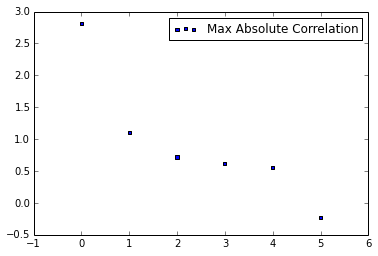

In [8]:
lars_obj.make_plots()

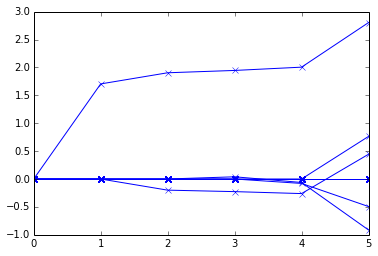

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(lars_obj.m):
      ax.plot(range(6),lars_obj.coefs_vs_iter[i][:6],'xb-',label="Coefficient "+str(i))
plt.show()

In [10]:
#lasso
lasso_obj = LARS(X,y,1)
lasso_obj.train()

we seem to be unable to progress though we have not included all parameters
printing indices used throughout iterations
[[], [2, 3], [2, 3, 28], [2, 3, 28, 8], [2, 3, 8], [2, 3, 8, 28], [2, 8, 28], [2, 28], [28]]


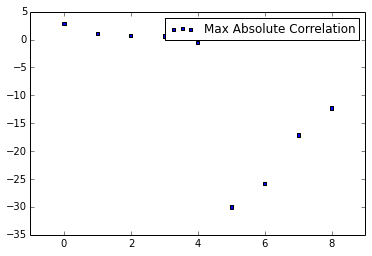

In [11]:
lasso_obj.make_plots()

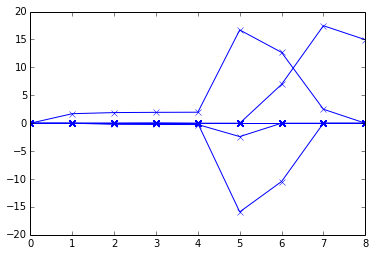

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(lasso_obj.m):
      ax.plot(range(9),lasso_obj.coefs_vs_iter[i][:9],'xb-',label="Coefficient "+str(i))
plt.show()